# 🔍 Classificação de Câncer de Mama usando SVM

Este projeto utiliza **Support Vector Machine (SVM)** para classificar tumores como benignos ou malignos no conjunto de dados **Breast Cancer Wisconsin**. O modelo é otimizado por **GridSearchCV** e avaliado por métricas como **acurácia, matriz de confusão e AUC/ROC**.

## 📊 **Fluxo do Código**
1. **Carregamento dos Dados**: Utiliza o dataset de câncer de mama do `sklearn.datasets`.
2. **Análise Exploratória**:
   - Exibição das primeiras linhas (`head()`).
   - Estatísticas descritivas (`describe()`).
   - Visualização das variáveis mais relevantes com **Pairplot** e **Heatmap de Correlação**.
3. **Pré-processamento**:
   - Normalização com `StandardScaler` para melhorar a performance do SVM.
   - Separação dos dados em **treino** e **teste**.
4. **Treinamento do Modelo**:
   - Utiliza um **SVM** com diferentes kernels (`linear`, `rbf`, `poly`).
   - Realiza ajuste de hiperparâmetros com **GridSearchCV**.
   - Seleciona o melhor modelo automaticamente.
5. **Avaliação do Modelo**:
   - Exibe **acurácia** e **relatório de classificação**.
   - Gera uma **Matriz de Confusão** para análise dos erros.
   - Plota a **Curva AUC/ROC** para verificar a performance do modelo.

## 🔧 **Requisitos**
- Python 3.8+
- Bibliotecas necessárias:
  ```sh
  pip install numpy pandas matplotlib seaborn scikit-learn


📌 Primeiras linhas do dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete

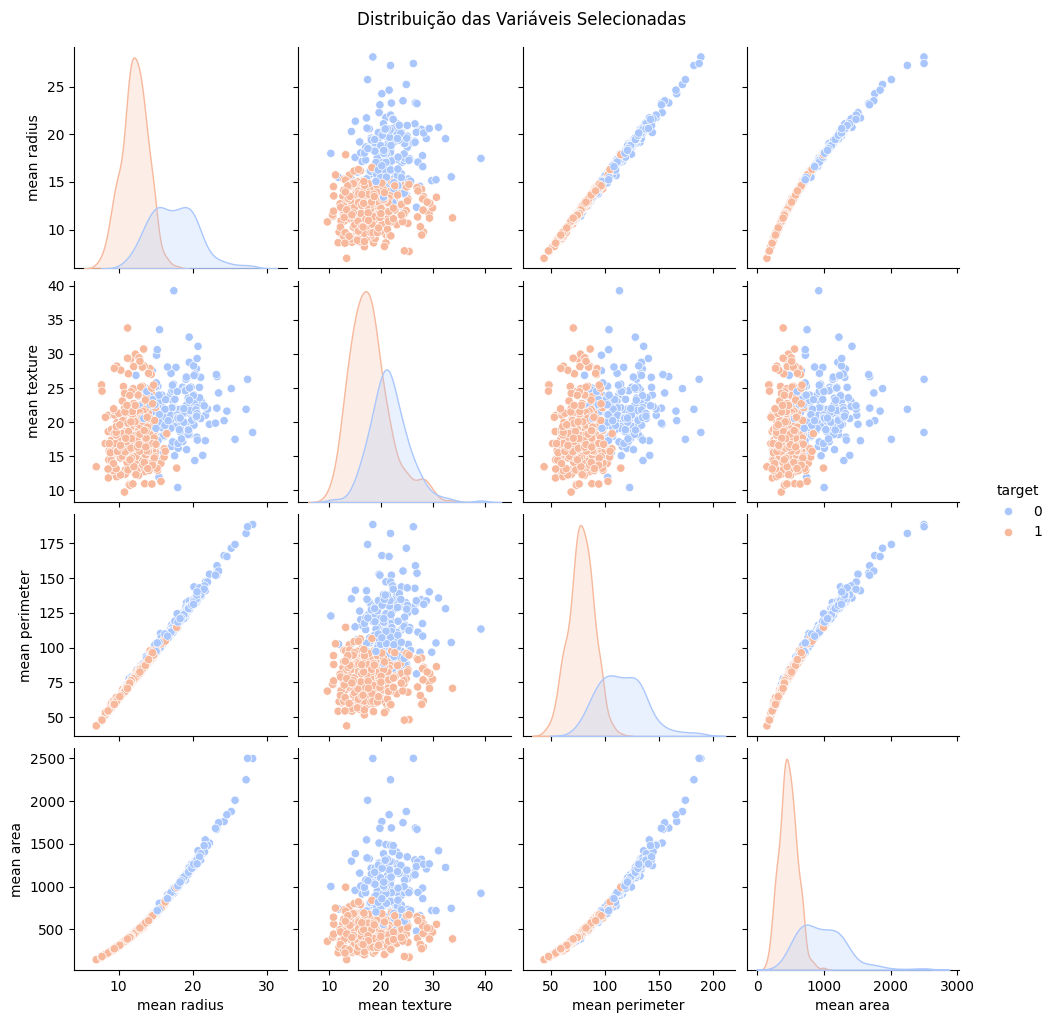

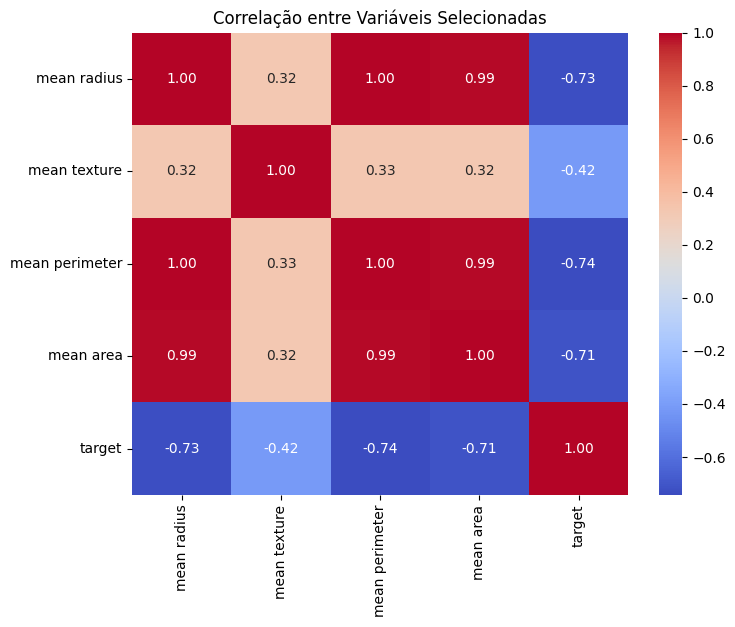

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits

🔎 Melhor modelo encontrado: {'C': 1, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': True}

✅ Acurácia do modelo: 0.9825

📋 Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



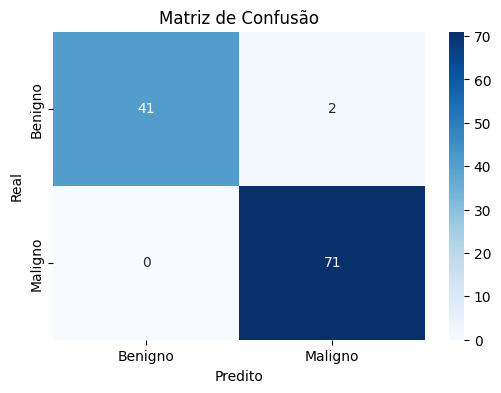

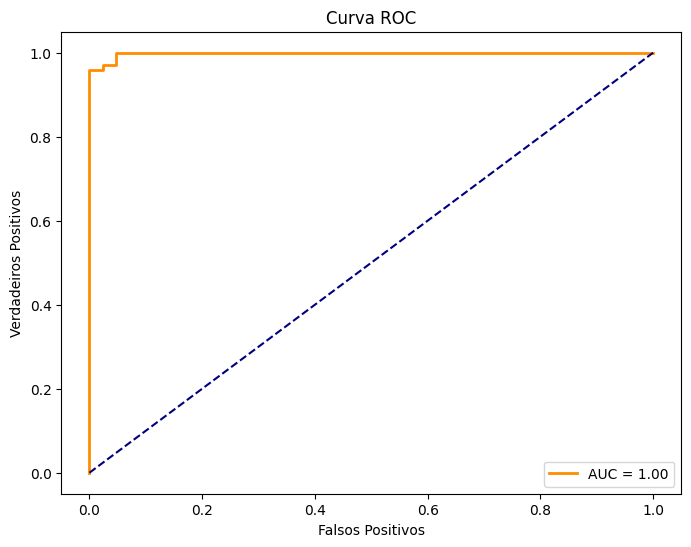

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Carregar o dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Exibir as primeiras linhas do dataset
print("📌 Primeiras linhas do dataset:")
print(df.head())

# Análise exploratória - Estatísticas básicas
print("\n📊 Estatísticas descritivas do dataset:")
print(df.describe())

# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['target']))
y = df['target']

# Reduzindo número de variáveis para visualização
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df_selected = df[selected_features + ['target']]

sns.pairplot(df_selected, hue='target', palette='coolwarm')
plt.suptitle("Distribuição das Variáveis Selecionadas", y=1.02)
plt.show()

# Heatmap de correlação das variáveis selecionadas
plt.figure(figsize=(8, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Selecionadas')
plt.show()

# Separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definição do modelo SVM
svm = SVC(probability=True)

# Ajuste de hiperparâmetros com GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Testa diferentes forças de regularização
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Testa múltiplos kernels
    'degree': [2, 3, 4],  # Apenas para kernel polinomial
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Impacta em `rbf`, `poly`, `sigmoid`
    'coef0': [0.0, 0.5, 1.0],  # Apenas para `poly` e `sigmoid`
    'shrinking': [True, False],  # Heurística de otimização
    'probability': [True]  # Necessário para probabilidades e curva ROC
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_svm = grid_search.best_estimator_
print(f"\n🔎 Melhor modelo encontrado: {grid_search.best_params_}")

# Avaliação do modelo
y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:, 1]

# Exibir a acurácia
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Acurácia do modelo: {acc:.4f}")

# Exibir relatório de classificação
print("\n📋 Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Gráfico AUC/ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
